<div class="alert alert-success">    
    <h1 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 40px;">هوش مصنوعی</h1>
    <h2 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 25px;">مجید محبی</h2>
    <h3 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 20px;">دانشکده مهندسی برق و کامپیوتر دانشگاه زنجان</h3>
    <h4 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 18px;">بهار 1404</h4>
</div>

<h4 style="charset:utf-8; lang:fa-IR; direction: rtl;text-align:right;font-family:B Roya;font-size: 26px;color:RGB(127,96,0)">

<body> 
پروژه شماره 4 – طراحی شبکه عصبی برای طبقه‌بندی دودویی
</body> 

</h4>

<h4 style="charset:utf-8; lang:fa-IR; direction: rtl;text-align:right;font-family:B Roya;font-size: 18px;color:RGB(127,96,0)">

<body>
نام و نام خانوادگی
<br>

</body> 

</h4>

<h4 style="charset:utf-8; lang:fa-IR; direction: rtl;text-align:right;font-family:B Roya;font-size: 18px;color:RGB(127,96,0)">

<body>
شماره دانشجویی
<br>

</body> 

</h4>

<h4 style="charset:utf-8; lang:fa-IR; direction: rtl;text-align:right;font-family:B Roya;font-size: 22px;color:RGB(127,96,0)">

<body>
با استفاده از کد زیر، یک مجموعه‌داده‌ی مصنوعی شامل ۱۰۰۰ نمونه از الگوی دایره‌های تو در تو (دو کلاس دایره‌ای) تولید شده و به سه بخش آموزش، اعتبارسنجی و تست تقسیم شده است. هدف، طراحی و پیاده‌سازی یک شبکه عصبی است که دقت مدل بر روی داده‌های تست بالای 92٪ باشد.
</body> 

</h4>

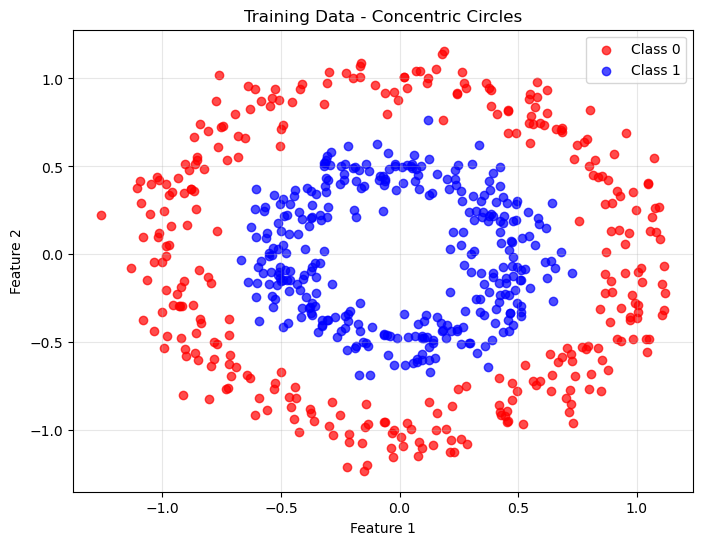

Epoch 1 | Train Loss: 0.6759, Val Loss: 0.6284, Val Acc: 0.5444
Epoch 50 | Train Loss: 0.4770, Val Loss: 0.4789, Val Acc: 0.8944
Epoch 100 | Train Loss: 0.3153, Val Loss: 0.3242, Val Acc: 0.9778
Epoch 150 | Train Loss: 0.1995, Val Loss: 0.2123, Val Acc: 0.9889
Epoch 200 | Train Loss: 0.1357, Val Loss: 0.1489, Val Acc: 1.0000
Epoch 250 | Train Loss: 0.0984, Val Loss: 0.1109, Val Acc: 1.0000
Epoch 300 | Train Loss: 0.0775, Val Loss: 0.0888, Val Acc: 1.0000
Epoch 350 | Train Loss: 0.0643, Val Loss: 0.0745, Val Acc: 1.0000
Epoch 400 | Train Loss: 0.0556, Val Loss: 0.0646, Val Acc: 1.0000
Epoch 450 | Train Loss: 0.0494, Val Loss: 0.0574, Val Acc: 1.0000
Epoch 500 | Train Loss: 0.0449, Val Loss: 0.0521, Val Acc: 1.0000
Epoch 550 | Train Loss: 0.0414, Val Loss: 0.0480, Val Acc: 1.0000
Epoch 600 | Train Loss: 0.0387, Val Loss: 0.0448, Val Acc: 1.0000
Epoch 650 | Train Loss: 0.0365, Val Loss: 0.0423, Val Acc: 1.0000
Epoch 700 | Train Loss: 0.0347, Val Loss: 0.0402, Val Acc: 1.0000
Epoch 750 | T

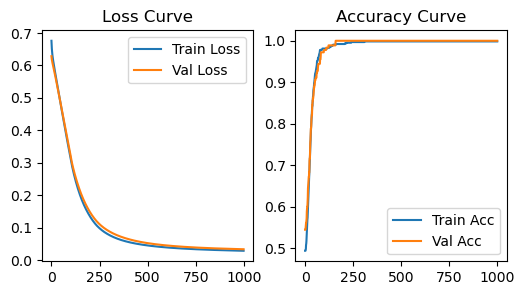

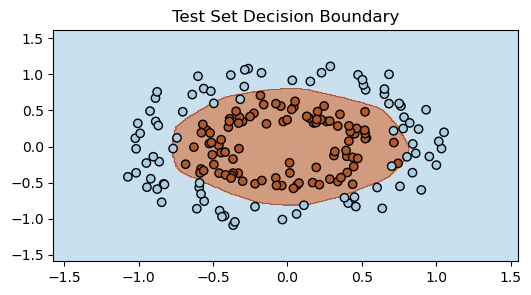


 Project Summary
 Test Accuracy: 0.9667 (96.67%)
 Best Threshold: 0.28
Epochs Trained: 1000
 Accuracy Goal (>= 92%): Met 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

np.random.seed(42)

X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5)
y = y.reshape(-1, 1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.36, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train[:, 0] == 0][:, 0], X_train[y_train[:, 0] == 0][:, 1], color='red', label='Class 0', alpha=0.7)
plt.scatter(X_train[y_train[:, 0] == 1][:, 0], X_train[y_train[:, 0] == 1][:, 1], color='blue', label='Class 1', alpha=0.7)
plt.title("Training Data - Concentric Circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

class NeuralNetwork:
    def __init__(self, input_size=2, hidden1_size=32, hidden2_size=16, output_size=1, 
                 learning_rate=0.1, l2_reg=0.0001):
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.l2_reg = l2_reg
        
        self.W1 = np.random.randn(input_size, hidden1_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((1, hidden1_size))
        self.W2 = np.random.randn(hidden1_size, hidden2_size) * np.sqrt(2.0 / hidden1_size)
        self.b2 = np.zeros((1, hidden2_size))
        self.W3 = np.random.randn(hidden2_size, output_size) * np.sqrt(2.0 / hidden2_size)
        self.b3 = np.zeros((1, output_size))
        
        self.train_losses, self.val_losses = [], []
        self.train_accuracies, self.val_accuracies = [], []

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = relu(self.z2)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = sigmoid(self.z3)
        return self.a3

    def backward(self, X, y, output):
        m = X.shape[0]
        dz3 = output - y
        dW3 = (1/m) * np.dot(self.a2.T, dz3) + self.l2_reg * self.W3
        db3 = (1/m) * np.sum(dz3, axis=0, keepdims=True)
        
        dz2 = np.dot(dz3, self.W3.T) * relu_derivative(self.z2)
        dW2 = (1/m) * np.dot(self.a1.T, dz2) + self.l2_reg * self.W2
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
        
        dz1 = np.dot(dz2, self.W2.T) * relu_derivative(self.z1)
        dW1 = (1/m) * np.dot(X.T, dz1) + self.l2_reg * self.W1
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)

        self.W3 -= self.learning_rate * dW3
        self.b3 -= self.learning_rate * db3
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def compute_cost(self, y_true, y_pred):
        m = y_true.shape[0]
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        cost = -(1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        l2 = self.l2_reg * (np.sum(self.W1**2) + np.sum(self.W2**2) + np.sum(self.W3**2))
        return cost + l2

    def predict(self, X, threshold=0.5):
        return (self.forward(X) >= threshold).astype(int)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

def train_model(nn, X_train, y_train, X_val, y_val, epochs=1000, early_stopping_patience=20):
    best_val_loss = float('inf')
    patience = 0
    best_weights = None
    
    for epoch in range(1, epochs + 1):
        output = nn.forward(X_train)
        nn.backward(X_train, y_train, output)

        train_loss = nn.compute_cost(y_train, output)
        val_output = nn.forward(X_val)
        val_loss = nn.compute_cost(y_val, val_output)

        train_acc = nn.accuracy(y_train, nn.predict(X_train))
        val_acc = nn.accuracy(y_val, nn.predict(X_val))

        nn.train_losses.append(train_loss)
        nn.val_losses.append(val_loss)
        nn.train_accuracies.append(train_acc)
        nn.val_accuracies.append(val_acc)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience = 0
            best_weights = {k: v.copy() for k, v in nn.__dict__.items() if k.startswith('W') or k.startswith('b')}
        else:
            patience += 1

        if epoch % 50 == 0 or epoch == 1:
            print(f"Epoch {epoch} | Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        
        if patience >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    if best_weights:
        for k in best_weights:
            setattr(nn, k, best_weights[k])
    
    return nn

def find_best_threshold(nn, X_val, y_val):
    thresholds = np.arange(0.1, 0.9, 0.01)
    best_acc, best_thresh = 0, 0.5
    probs = nn.forward(X_val)
    
    for t in thresholds:
        acc = nn.accuracy(y_val, (probs >= t).astype(int))
        if acc > best_acc:
            best_acc = acc
            best_thresh = t

    print(f"Best threshold: {best_thresh:.2f} | Accuracy: {best_acc:.4f}")
    return best_thresh

def plot_training_history(nn):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    axs[0].plot(nn.train_losses, label='Train Loss')
    axs[0].plot(nn.val_losses, label='Val Loss')
    axs[0].set_title("Loss Curve")
    axs[0].legend()
    
    axs[1].plot(nn.train_accuracies, label='Train Acc')
    axs[1].plot(nn.val_accuracies, label='Val Acc')
    axs[1].set_title("Accuracy Curve")
    axs[1].legend()
    plt.show()

def plot_decision_boundary(model, X, y, threshold=0.5, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.forward(grid)
    preds = (probs >= threshold).astype(int).reshape(xx.shape)

    plt.figure(figsize=(6, 3))
    plt.contourf(xx, yy, preds, cmap=plt.cm.Paired, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.Paired, edgecolors='k')
    plt.title(title)
    plt.show()

nn = NeuralNetwork()
trained_nn = train_model(nn, X_train, y_train, X_val, y_val)
best_threshold = find_best_threshold(trained_nn, X_val, y_val)

test_preds = trained_nn.predict(X_test, threshold=best_threshold)
test_acc = trained_nn.accuracy(y_test, test_preds)
print(f"\n Final Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
plot_training_history(trained_nn)

plot_decision_boundary(trained_nn, X_test, y_test, threshold=best_threshold, title="Test Set Decision Boundary")

print("\n" + "="*40)
print(" Project Summary")
print("="*40)
print(f" Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f" Best Threshold: {best_threshold:.2f}")
print(f"Epochs Trained: {len(trained_nn.train_losses)}")
print(" Accuracy Goal (>= 92%):", "Met " if test_acc >= 0.92 else "Not Met ")
